# Credit Score Classification Project
## Muhammad Faisal Kamran 2023-BS-AI-025

## About Dataset
The dataset contains 100,000 records of customer financial behavior with 28 features, including income, debt, credit history, and payment patterns.
Key features include
- Annual_Income and Monthly_Inhand_Salary
- Num_Bank_Accounts, Num_Credit_Card
- Interest_Rate
- Num_of_Loan and Delay_from_due_date
- Num_of_Delayed_Payment
- Credit_Mix
- Outstanding_Debt
- Credit_Utilization_Ratio and Credit_History_Age
- Total_EMI_per_month
- Monthly_Balance


## Introduction to Python and Libraries for Machine Learning, Environmental Setup

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [2]:
df = pd.read_csv('train.csv')

## Exploring Dataset

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [5]:
df.sample()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
66137,104839,46284,2,Langey,22.0,139760236.0,Musician,48434.66,4201.221667,5.0,...,Standard,23.19,27.706739,279.0,Yes,0.0,70.91438,High_spent_Small_value_payments,503.484816,Standard


In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## Handling missing values, data normalization, standardization, Data visualization

### Handling missing values

In [7]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(['', 'NA', 'NaN'], np.nan)
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].replace(['', 'NA', 'NaN'], np.nan, inplace=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

### Encode categorical columns

In [9]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### Visualizations

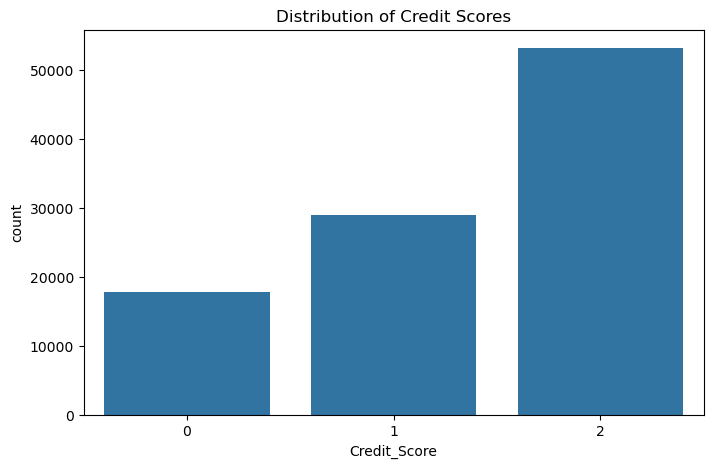

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_Score', data=df)
plt.title('Distribution of Credit Scores')
plt.show()

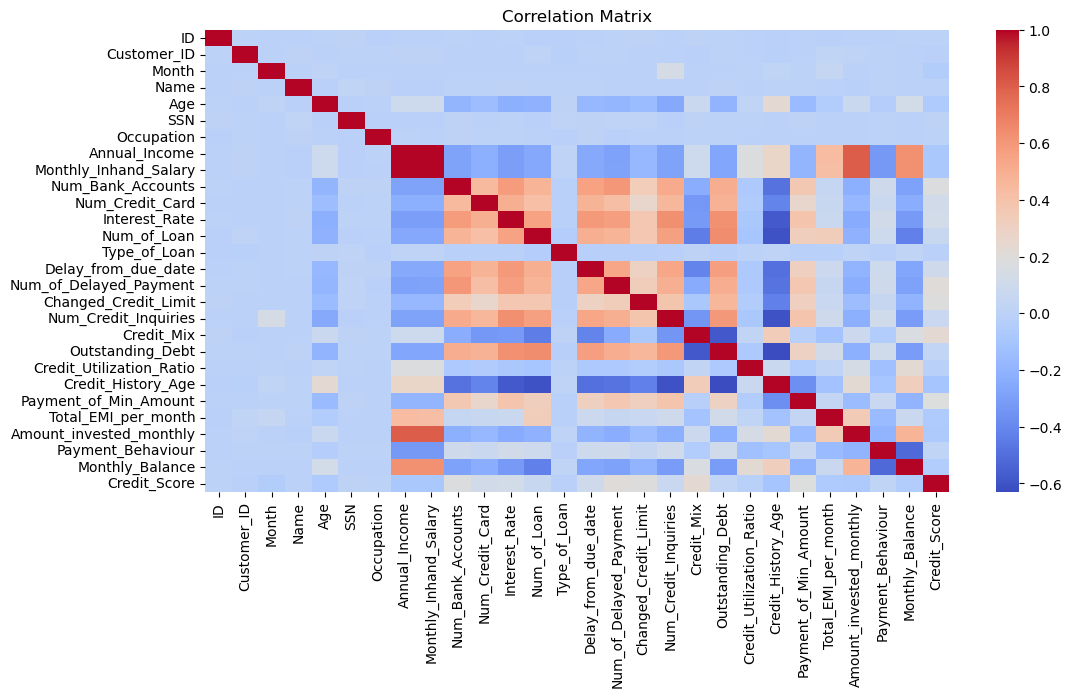

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Select only 12 relevant features for training and prediction

In [12]:
selected_features = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Credit_Mix',
    'Outstanding_Debt',
    'Credit_History_Age',
    'Monthly_Balance'
]

X = df[selected_features]
y = df['Credit_Score']

### Normalize/standardize features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Data Preprocessing

### Correlation Analysis

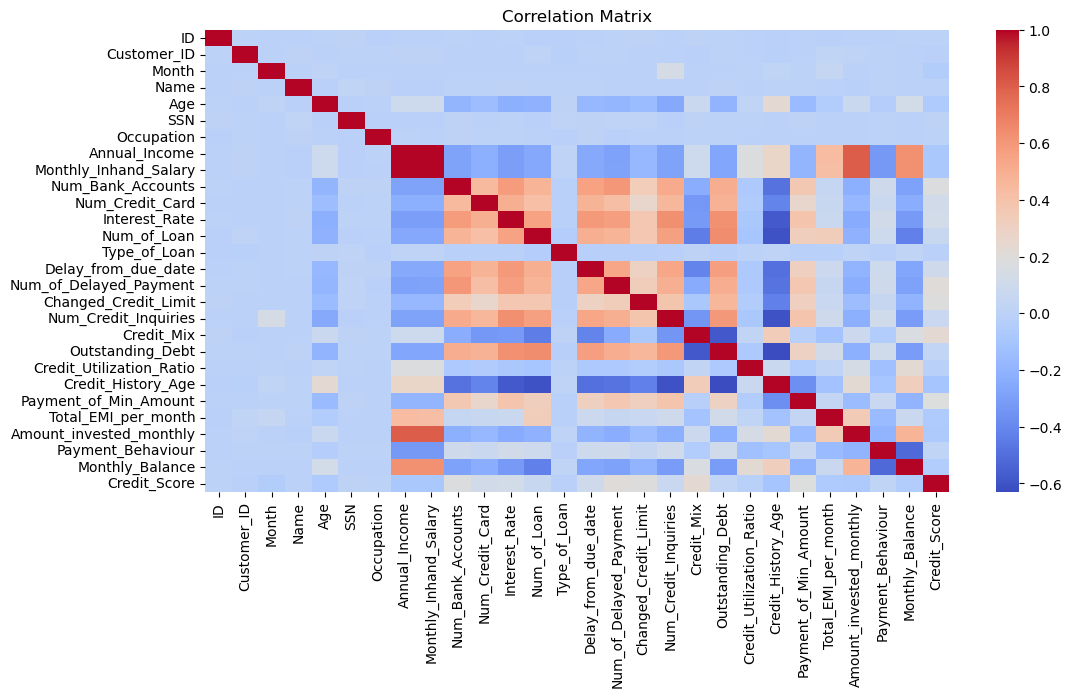

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Outlier Detection

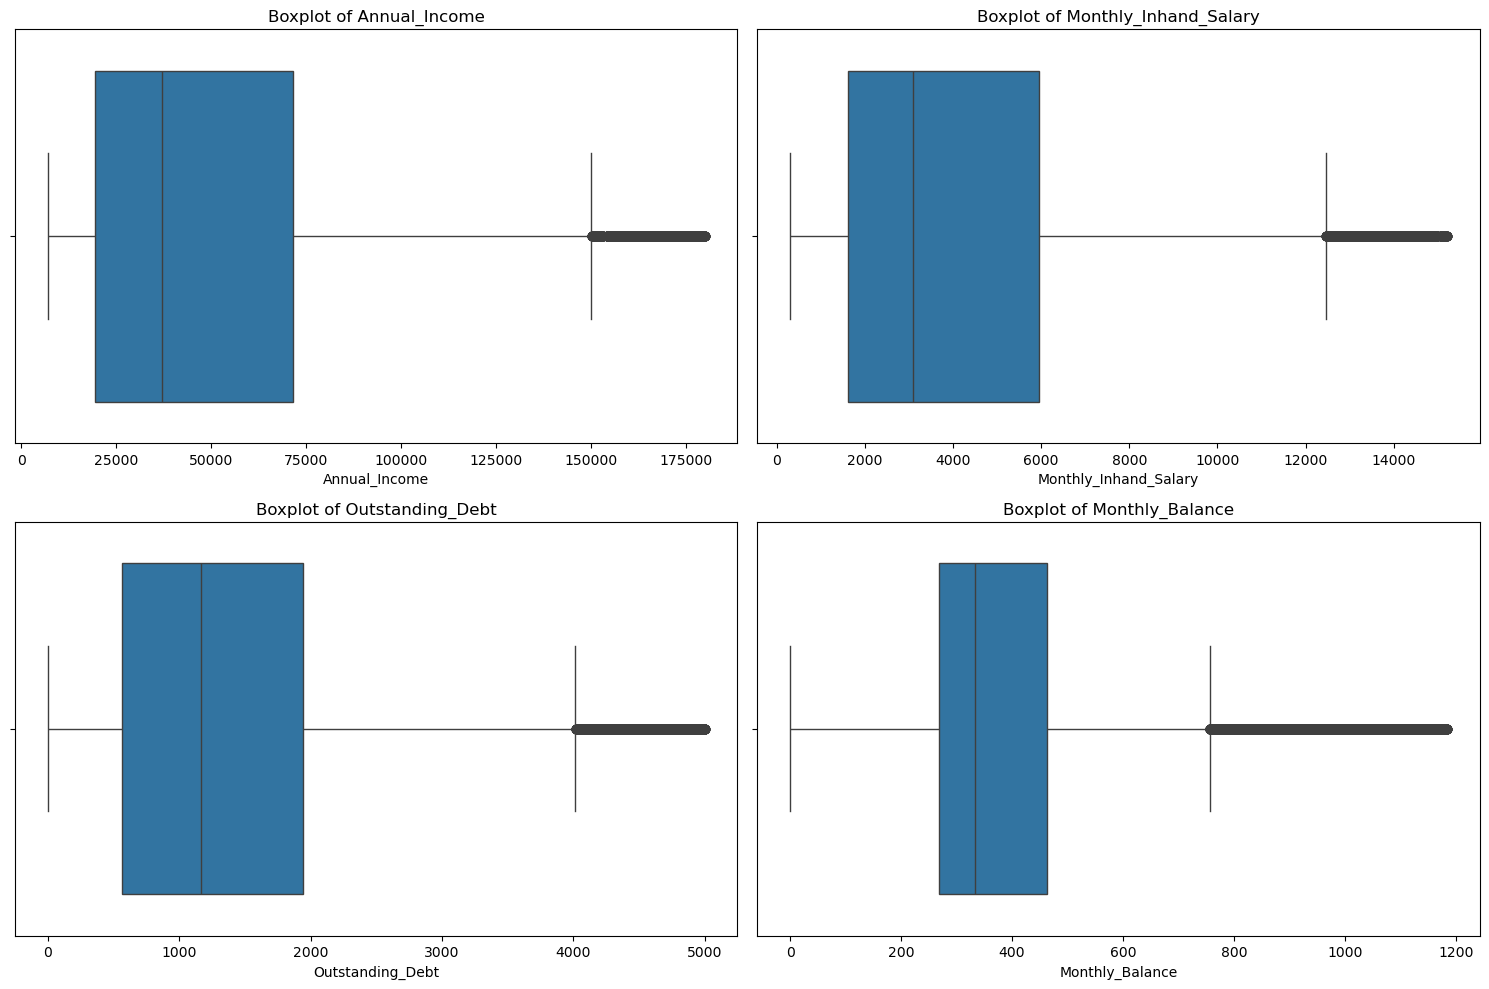

In [15]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Monthly_Balance']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      3527
           1       0.62      0.50      0.55      5874
           2       0.65      0.73      0.68     10599

    accuracy                           0.63     20000
   macro avg       0.61      0.59      0.60     20000
weighted avg       0.62      0.63      0.62     20000



## Decision Tree

In [18]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      3527
           1       0.77      0.76      0.76      5874
           2       0.78      0.79      0.78     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



## Linear Support Vector Machine

In [19]:
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nLinear SVM Report:\n", classification_report(y_test, y_pred_svm))


Linear SVM Report:
               precision    recall  f1-score   support

           0       0.55      0.54      0.54      3527
           1       0.61      0.51      0.55      5874
           2       0.65      0.71      0.68     10599

    accuracy                           0.62     20000
   macro avg       0.60      0.59      0.59     20000
weighted avg       0.62      0.62      0.62     20000



## Evaluation Metrics


Logistic Regression Accuracy: 0.6267
Logistic Regression Confusion Matrix:
[[1880   63 1584]
 [ 286 2951 2637]
 [1114 1782 7703]]


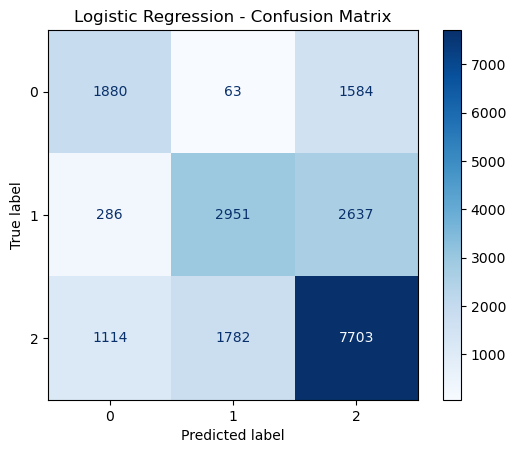


Decision Tree Accuracy: 0.7633
Decision Tree Confusion Matrix:
[[2480   54  993]
 [  69 4457 1348]
 [ 963 1307 8329]]


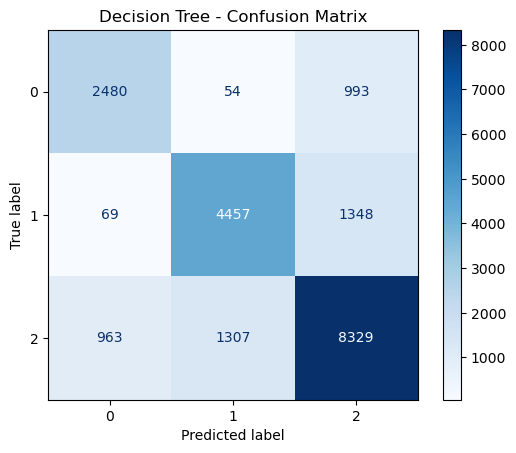


Linear SVM Accuracy: 0.6204
Linear SVM Confusion Matrix:
[[1895   68 1564]
 [ 367 2985 2522]
 [1214 1857 7528]]


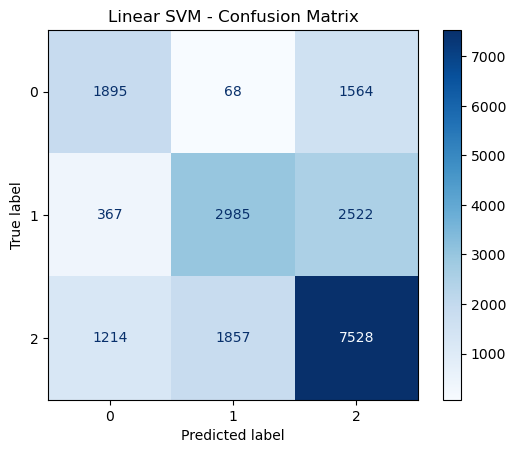

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc

def evaluate_and_plot(model, X_test, y_test, model_name, is_binary=False):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} Confusion Matrix:\n{cm}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    if is_binary and hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"{model_name} AUC Score: {roc_auc:.4f}")

        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

is_binary = len(np.unique(y_test)) == 2

evaluate_and_plot(log_reg, X_test, y_test, "Logistic Regression", is_binary=is_binary)
evaluate_and_plot(dt, X_test, y_test, "Decision Tree", is_binary=is_binary)
evaluate_and_plot(svm, X_test, y_test, "Linear SVM", is_binary=False)  


## Training, Evaluating Model and Output of the Model

In [24]:
print("\nCredit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = int(input("Credit Mix (Bad: 0, Standard: 1, Good: 2): "))
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

user_features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
user_features_scaled = scaler.transform(user_features)

print("Predicted Credit Score =", dt.predict(user_features_scaled)[0])



Credit Score Prediction : 


Annual Income:  150000
Monthly Inhand Salary:  8000
Number of Bank Accounts:  6
Number of Credit cards:  5
Interest rate:  18
Number of Loans:  6
Average number of days delayed by the person:  20
Number of delayed payments:  15
Credit Mix (Bad: 0, Standard: 1, Good: 2):  0
Outstanding Debt:  120000
Credit History Age:  12
Monthly Balance:  1000


Predicted Credit Score = 1
